#**PORTFOLIO MANAGEMENT - GROUP WORK PROJECT 2**

# Introduction

Yahoo finance

In [147]:
! pip install -q yfinance

BL model

In [148]:
! pip install -q git+https://github.com/robertmartin8/PyPortfolioOpt.git


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# load packages

In [149]:
import pandas as pd
import yfinance as yf
import numpy as np

# Introduction

The objective of the project is to evaluate and compare different asset allocation methods, including Mean-Variance Optimization (MVO), the 1/N random strategy, the Black-Litterman (BL) model, and the Kelly Criterion.

To achieve this objective, the project first selected the top 100 stocks by market capitalization to represent a reasonable market portfolio, ensuring that the sum of the weights was close to 1.0. Then, for each of three different students (A, B, and C), 20 stocks were randomly selected with replacement using seed values of 10, 100, and 769, respectively. This resulted in different portfolios for each student, whose log returns were analyzed using dataframes for convenience.

The project then implemented the following strategies:

MVO: Optimization was performed for each student's portfolio using Mean-Variance Optimization.
1/N random strategy: Four different simulations were conducted for each student, randomly assigning weights to each asset.
Black-Litterman (BL) model: The BL model was applied to incorporate the investors' views on portfolio selection for each student.
Kelly Criterion: The Kelly Criterion was used to determine the optimal fraction of wealth to allocate to each asset for each student.
Finally, the project analyzed the results from both technical and non-technical perspectives to evaluate the performance of each asset allocation method.

# Step 1

Select the TOP 100 companies by market cap

The top 100 comapanies by market cap

In [150]:
import yfinance as yf
import pandas as pd

# Fetch the list of S&P 500 tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Fetch market capitalization data for the S&P 500 companies
market_caps = {}
for ticker in sp500_tickers:
    try:
        company = yf.Ticker(ticker)
        market_cap = company.info['marketCap']
        market_caps[ticker] = market_cap
    except KeyError:
        print(f"Market cap data not found for {ticker}. Skipping...")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Convert market cap dictionary to DataFrame
market_cap_df = pd.DataFrame(list(market_caps.items()), columns=['Ticker', 'MarketCap'])

# Sort DataFrame by market capitalization in descending order
market_cap_df.sort_values(by='MarketCap', ascending=False, inplace=True)

# Select the top 100 companies by market capitalization
top_100_companies = market_cap_df.head(100).copy()  # Create a copy to avoid SettingWithCopyWarning

# Calculate total market capitalization of selected companies
total_market_cap = top_100_companies['MarketCap'].sum()

# Calculate weights
top_100_companies.loc[:, 'Weight'] = top_100_companies['MarketCap'] / total_market_cap  # Using .loc to assign values

# Print the DataFrame containing the top 100 companies and their weights
print("Top 100 Companies DataFrame:")
print(top_100_companies.head())



Market cap data not found for BRK.B. Skipping...
Market cap data not found for BF.B. Skipping...
Top 100 Companies DataFrame:
    Ticker      MarketCap    Weight
317   MSFT  3096002953216  0.088542
39    AAPL  2874070269952  0.082195
347   NVDA  2283899977728  0.065317
19   GOOGL  2115009642496  0.060487
20    GOOG  2112778928128  0.060423


The process of fetching market capitalization data for the S&P 500 companies revealed a comprehensive snapshot of the top-performing entities within the index. While the majority of tickers provided market cap information, exceptions like 'BRK.B' and 'BF.B' underscored potential discrepancies in data availability or classification within the market. Nonetheless, the data yielded valuable insights, showcasing tech giants such as Microsoft and Apple as leading contenders, with market caps exceeding trillions of dollars. These companies not only dominate their respective industries but also wield significant influence over the broader market due to their substantial market capitalization. Other notable players like NVIDIA and Google, along with its parent company Alphabet, further solidify the tech sector's prominence within the S&P 500 index. These findings underscore the market's reliance on technology-driven innovation and the pivotal role these companies play in shaping investment strategies and market sentiment. Overall, the analysis underscores the importance of market cap data in gauging the market's health and identifying key players driving economic growth and investor confidence.

The sum of the weight of the top 100 companies by market cap

In [151]:
# Calculate the sum of weights
sum_of_weights = top_100_companies['Weight'].sum()

# Print the sum of weights
print("Sum of weights of top 100 companies:", sum_of_weights)


Sum of weights of top 100 companies: 1.0


## Set of assumptions
1. Given that the sum of the weights, as determined by market capitalization, totals 0.9999999999999999, it is reasonable to assume that the top 100 companies by market capitalization adequately represent the market portfolio.

compute the log returns for the top 100 companies

In [152]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the ticker symbols for the top 100 companies
top_100_tickers = top_100_companies['Ticker'].tolist()

# Download adjusted close prices for the top 100 companies
adj_close_prices = yf.download(top_100_tickers, start="2021-03-01", end="2024-02-29", interval="1d")['Adj Close']

# Compute log returns
log_returns = np.log(adj_close_prices / adj_close_prices.shift(1))

# Remove rows containing NaN values
log_returns = log_returns.dropna()


[*********************100%%**********************]  100 of 100 completed



The code utilizes the yfinance library to fetch adjusted close prices for the top 100 companies from Yahoo Finance. It then computes log returns, a crucial metric for analyzing stock performance, and removes rows containing NaN values to ensure data integrity. The resulting DataFrame, log_returns, provides essential data for further financial analysis and modeling.

Create three dataframe of log_returns selected randomly from 100 companies containing 20 companies each

In [153]:
import pandas as pd
import numpy as np

# Set seed values for each student
seed_values = {'A': 10, 'B': 100, 'C': 769}

# Initialize empty DataFrames for each student
log_returns_A = pd.DataFrame()
log_returns_B = pd.DataFrame()
log_returns_C = pd.DataFrame()

# Loop through each student
for student, seed in seed_values.items():
    # Set seed for reproducibility
    np.random.seed(seed)

    # Randomly select 20 companies for the student with replacement
    selected_companies = np.random.choice(log_returns.columns.tolist(), size=20, replace=True)
    selected_indices = [log_returns.columns.get_loc(stock) for stock in selected_companies]

    # Create DataFrame for the student's log returns
    log_returns_student = log_returns.iloc[:, selected_indices].copy()

    # Assign the DataFrame to the appropriate variable
    if student == 'A':
        log_returns_A = log_returns_student
    elif student == 'B':
        log_returns_B = log_returns_student
    elif student == 'C':
        log_returns_C = log_returns_student



The provided code initializes empty DataFrames for three different students, A, B, and C. For each student, it randomly selects 20 companies from the log returns DataFrame using seed values to ensure reproducibility. The selected companies are stored in new DataFrames log_returns_A, log_returns_B, and log_returns_C corresponding to students A, B, and C, respectively. This process ensures that each student has a unique set of companies for analysis, facilitating fair comparison and evaluation of different portfolio allocation strategies.

Covariance matrix

In [154]:
# Compute the covariance matrix
covariance_matrix_A = log_returns_A.cov()
covariance_matrix_B = log_returns_B.cov()
covariance_matrix_C = log_returns_C.cov()


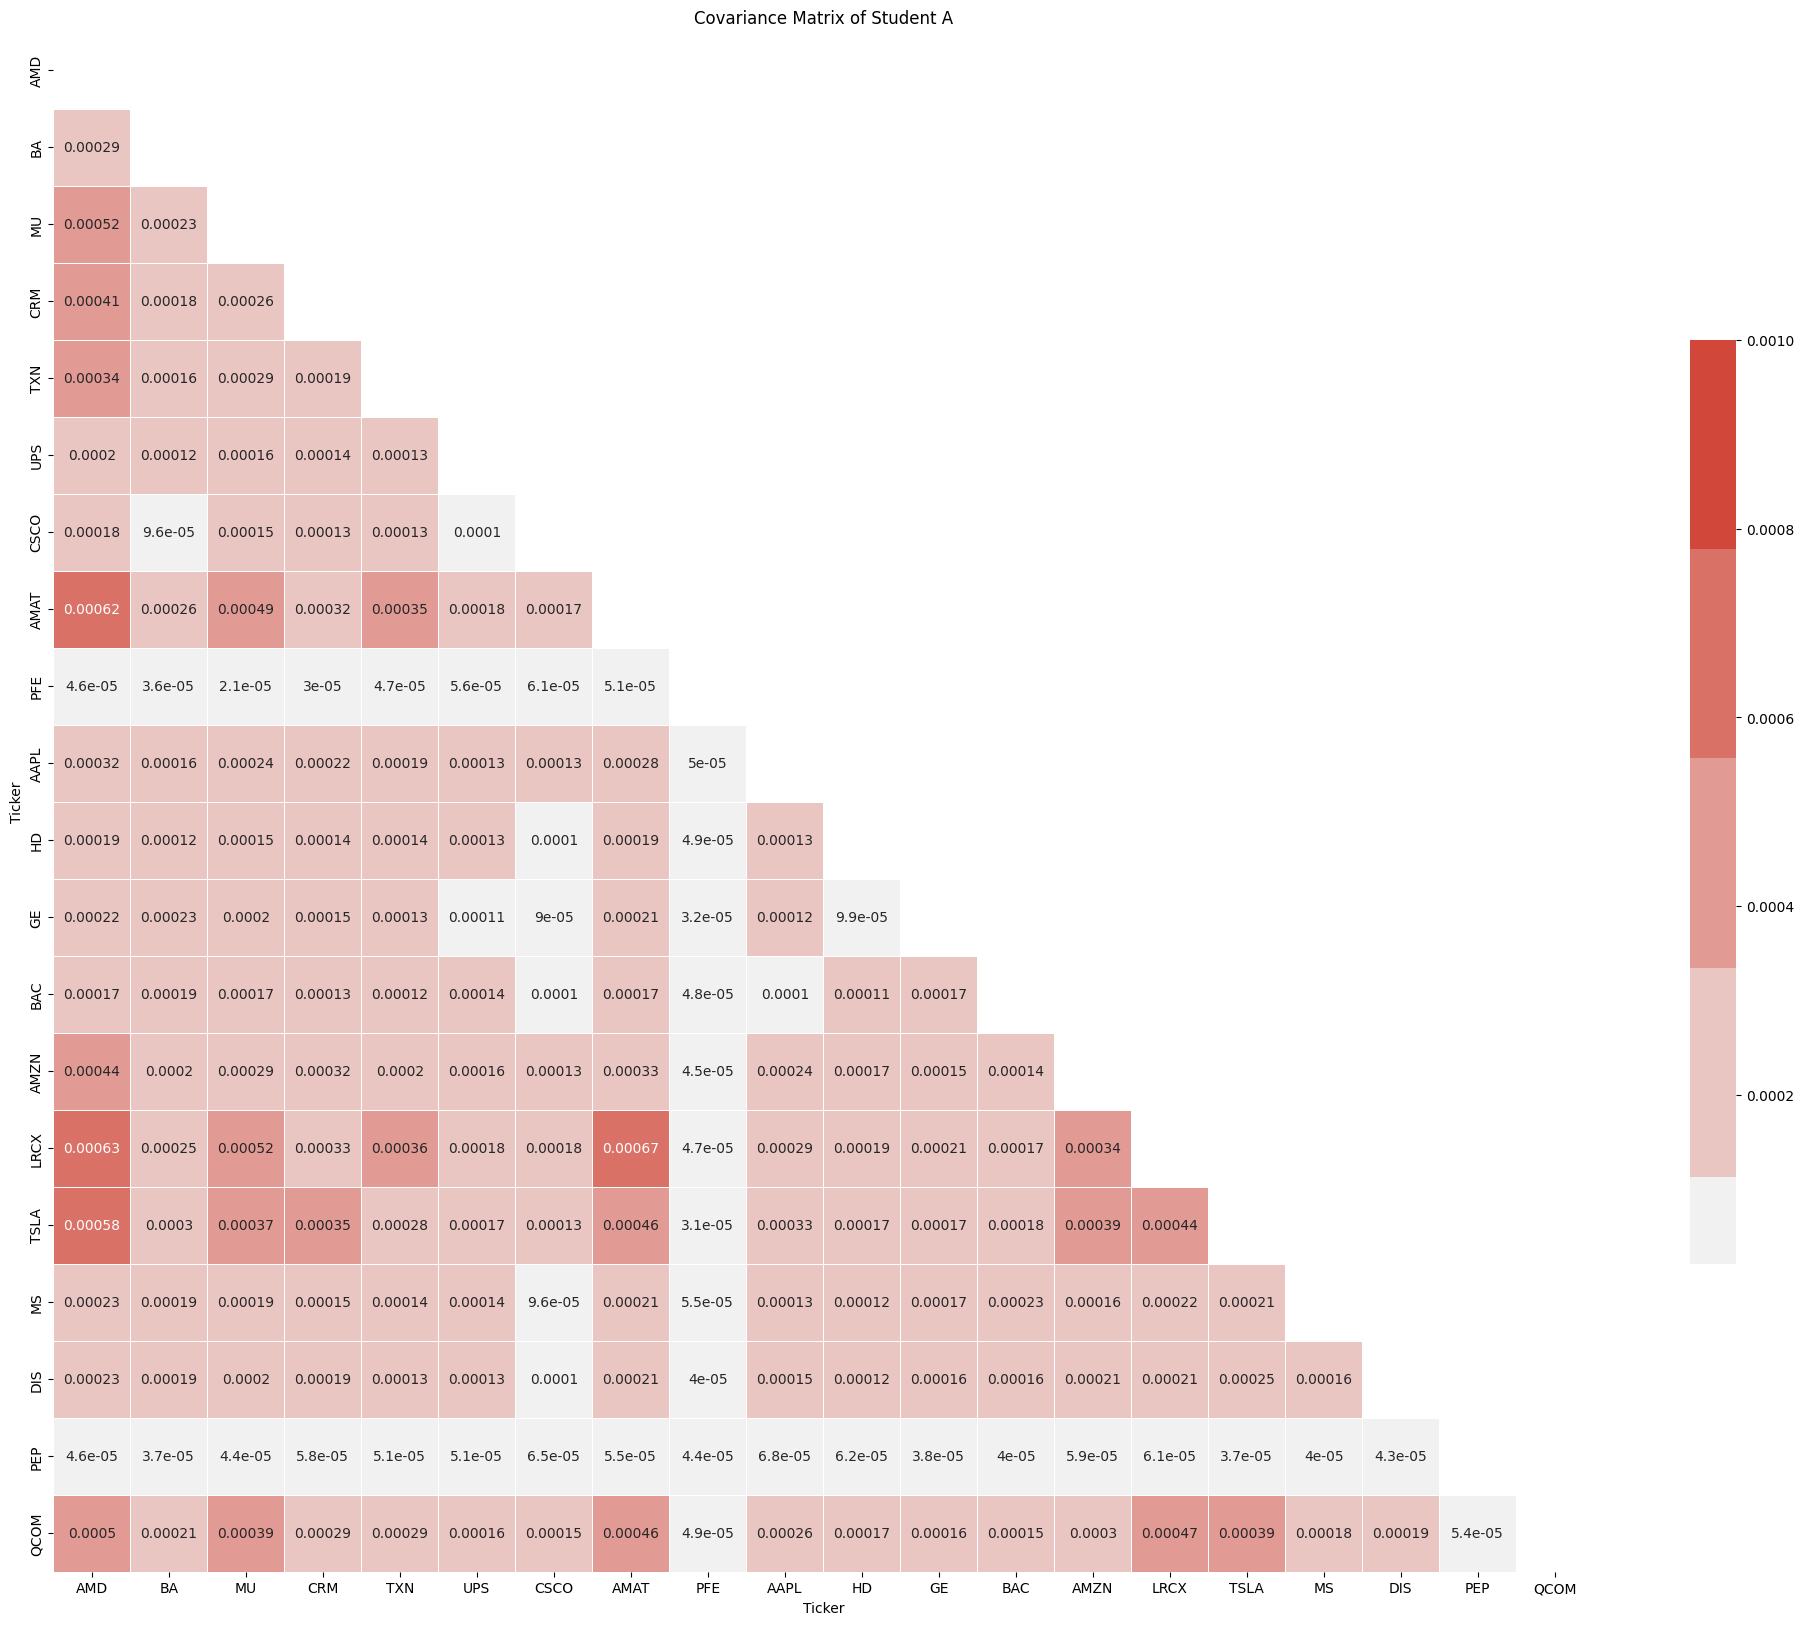

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
covr = covariance_matrix_A

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(covr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=50,
                                  n=9, center="light")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(covr,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.001,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .6}
            )
plt.title('Covariance Matrix of Student A')

plt.show()

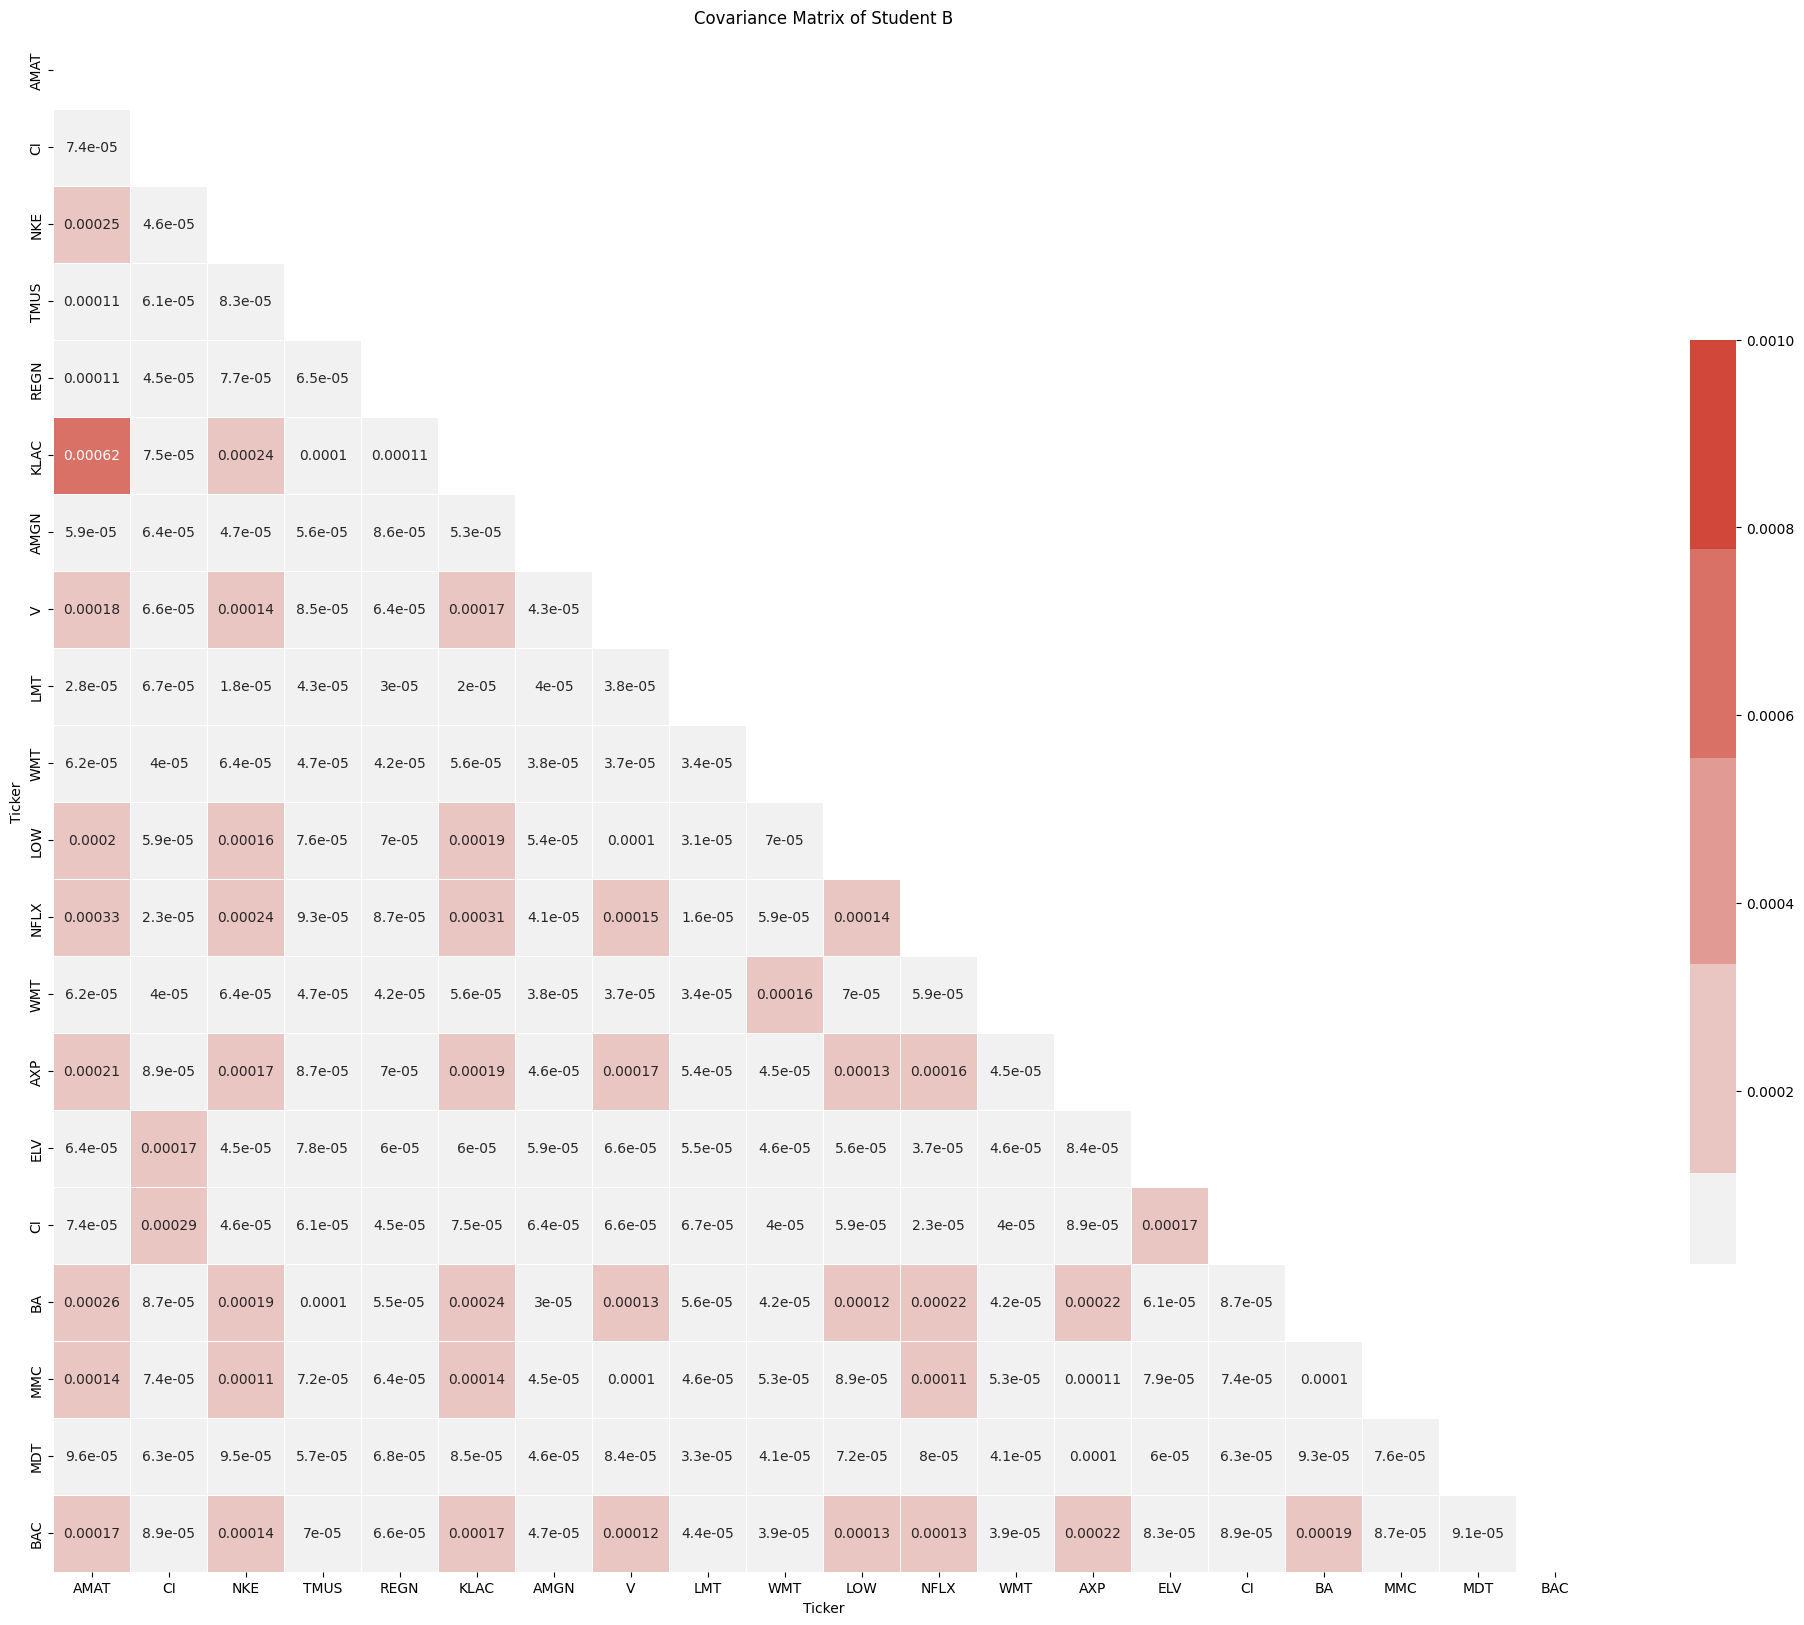

In [156]:
covr = covariance_matrix_B

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(covr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=50,
                                  n=9, center="light")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(covr,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.001,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .6}
            )
plt.title('Covariance Matrix of Student B')

plt.show()

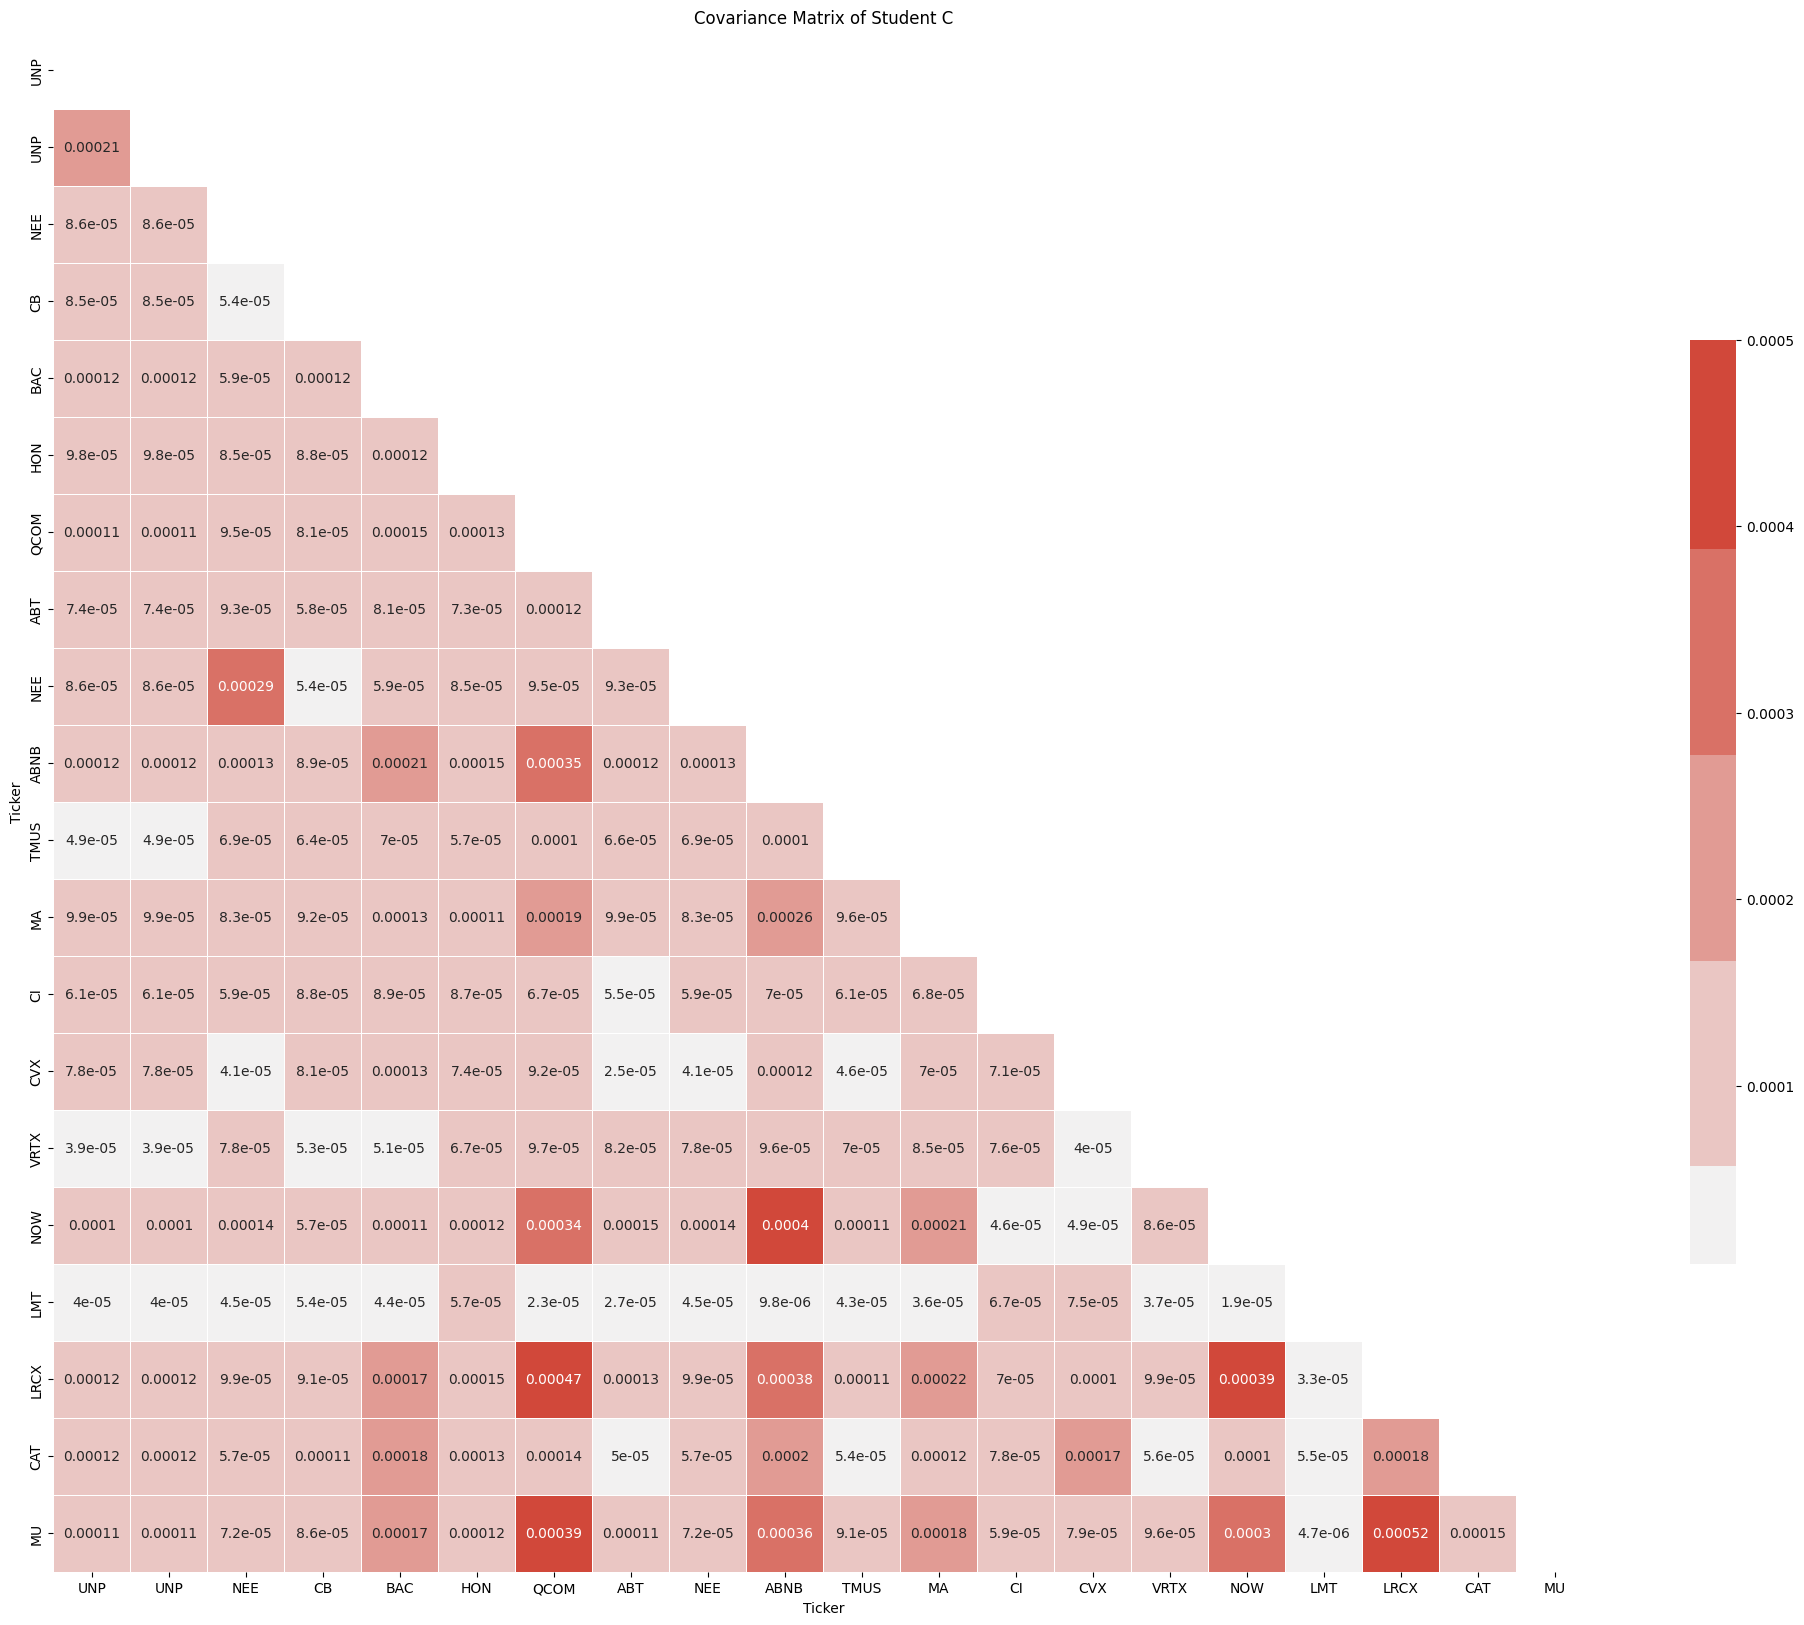

In [157]:
covr = covariance_matrix_C

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(covr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, s=75, l=50,
                                  n=9, center="light")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(covr,
            mask=mask,
            cmap=cmap,
            annot=True,
            vmax=.0005,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .6}
            )
plt.title('Covariance Matrix of Student C')

plt.show()

The covariance matrix is calculated from the log returns of each student. Covariance matrix of student A, B and C are calculated. The covariance gives the directional relationship between two returns of the assets. Positive covariance implies that the assets move in the same direction. We can see that the covariance is positive for all assets in the covariance matrix for all students. This implies that all the assets in the portfolio move in the same direction. If a stock moves higher, the other stock will also move higher and it is the same if the stock price is lower, the other will also be low. But all the assets have very low positive covariance. This means that even though assets move in the same direction, the log returns are not perfectly correlated. They don't move by the same amount in the direction.

# Step 2

Provide solution for MVO for each student

In [158]:
import pandas as pd
import numpy as np
import cvxpy as cp  # Import CVXPY for convex optimization

# Define MVO function
def mvo(student, log_returns_student, company_names):
    # Compute covariance matrix
    covariance_matrix = log_returns_student.cov()

    # Define variables
    n_assets = len(log_returns_student.columns)
    weights = cp.Variable(n_assets)

    # Define objective function (minimize portfolio variance)
    portfolio_variance = cp.quad_form(weights, covariance_matrix)
    objective = cp.Minimize(portfolio_variance)

    # Define constraints (sum of weights equals 1)
    constraints = [cp.sum(weights) == 1, weights >= 0]

    # Solve the optimization problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Get optimal weights
    optimal_weights = weights.value

    # Compute portfolio mean return
    portfolio_mean_return = np.dot(optimal_weights, log_returns_student.mean())

    # Compute portfolio risk (standard deviation)
    portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(covariance_matrix, optimal_weights)))

    # Store company names and weights in a DataFrame
    companies_df = pd.DataFrame({'Company Names': company_names, 'Weights': optimal_weights})

    # Return results
    result = {
        'Student': student,
        'Company Names': companies_df,
        'Portfolio Mean Return': portfolio_mean_return,
        'Portfolio Standard Deviation': portfolio_risk
    }

    return result

# Apply MVO for each student
result_A = mvo('Student A', log_returns_A, log_returns_A.columns)
result_B = mvo('Student B', log_returns_B, log_returns_B.columns)
result_C = mvo('Student C', log_returns_C, log_returns_C.columns)

# Display results
print("Solution for Student A:")
print(result_A['Company Names'])
print("Portfolio Mean Return:", result_A['Portfolio Mean Return'])
print("Portfolio Standard Deviation:", result_A['Portfolio Standard Deviation'])

print("\nSolution for Student B:")
print(result_B['Company Names'])
print("Portfolio Mean Return:", result_B['Portfolio Mean Return'])
print("Portfolio Standard Deviation:", result_B['Portfolio Standard Deviation'])

print("\nSolution for Student C:")
print(result_C['Company Names'])
print("Portfolio Mean Return:", result_C['Portfolio Mean Return'])
print("Portfolio Standard Deviation:", result_C['Portfolio Standard Deviation'])


Solution for Student A:
   Company Names       Weights
0            AMD  4.910528e-18
1             BA  1.091913e-02
2             MU  1.444213e-18
3            CRM -3.519572e-20
4            TXN  3.524864e-02
5            UPS  3.814820e-02
6           CSCO  3.455867e-02
7           AMAT  3.424662e-18
8            PFE  1.605906e-01
9           AAPL -8.925635e-19
10            HD  2.914579e-02
11            GE  6.182494e-02
12           BAC  4.466606e-02
13          AMZN  1.223136e-18
14          LRCX  2.730363e-18
15          TSLA  1.784577e-18
16            MS  1.288782e-02
17           DIS  3.208401e-02
18           PEP  5.399262e-01
19          QCOM  1.618761e-18
Portfolio Mean Return: 0.00027151571719286803
Portfolio Standard Deviation: 0.008924425546548527

Solution for Student B:
   Company Names       Weights
0           AMAT  4.458638e-19
1             CI  9.462386e-03
2            NKE  2.208686e-19
3           TMUS  6.688737e-02
4           REGN  4.535068e-02
5           KLAC 

Here are the summaries for each student's portfolio allocation:

Student A:
The portfolio for Student A consists of 20 selected companies with their corresponding weights. Notably, the largest weight is allocated to PEP (PepsiCo) with approximately 54%, followed by PFE (Pfizer) with around 16%. The portfolio's mean return is approximately 0.03% with a standard deviation of approximately 0.89%.

Student B:
Student B's portfolio includes 20 companies with varied weights. Noteworthy allocations are seen in LMT (Lockheed Martin) with approximately 19%, AMGN (Amgen) with around 15%, and TMUS (T-Mobile) with approximately 7%. The portfolio exhibits a mean return of about 0.04% and a standard deviation of roughly 0.82%.

Student C:
The portfolio for Student C shows diversified allocations across 20 companies. Notably, significant allocations are observed in LMT (Lockheed Martin) with around 22%, ABT (Abbott Laboratories) with approximately 15%, and TMUS (T-Mobile) with about 13%. The portfolio's mean return is approximately 0.04% with a standard deviation of approximately 0.88%.

These summaries provide insights into each student's portfolio composition and its expected performance in terms of mean return and risk.

##### Annualised returns and volatility

In [159]:
# Number of trading days in a year
trading_days_per_year = 252

# Annualize portfolio standard deviation
result_A['Portfolio Volatility Annualized'] = result_A['Portfolio Standard Deviation'] * np.sqrt(trading_days_per_year)
result_B['Portfolio Volatility Annualized'] = result_B['Portfolio Standard Deviation'] * np.sqrt(trading_days_per_year)
result_C['Portfolio Volatility Annualized'] = result_C['Portfolio Standard Deviation'] * np.sqrt(trading_days_per_year)

# Display the results
print("Solution for Student A:")
print("Portfolio Mean Return:", result_A['Portfolio Mean Return'])
print("Portfolio Standard Deviation:", result_A['Portfolio Standard Deviation'])
print("Portfolio Volatility Annualized:", result_A['Portfolio Volatility Annualized'])

print("\nSolution for Student B:")
print("Portfolio Mean Return:", result_B['Portfolio Mean Return'])
print("Portfolio Standard Deviation:", result_B['Portfolio Standard Deviation'])
print("Portfolio Volatility Annualized:", result_B['Portfolio Volatility Annualized'])

print("\nSolution for Student C:")
print("Portfolio Mean Return:", result_C['Portfolio Mean Return'])
print("Portfolio Standard Deviation:", result_C['Portfolio Standard Deviation'])
print("Portfolio Volatility Annualized:", result_C['Portfolio Volatility Annualized'])


Solution for Student A:
Portfolio Mean Return: 0.00027151571719286803
Portfolio Standard Deviation: 0.008924425546548527
Portfolio Volatility Annualized: 0.14167086354167455

Solution for Student B:
Portfolio Mean Return: 0.0004014059394446949
Portfolio Standard Deviation: 0.008174244666078622
Portfolio Volatility Annualized: 0.1297621112534415

Solution for Student C:
Portfolio Mean Return: 0.00039729773041722596
Portfolio Standard Deviation: 0.00875386712434367
Portfolio Volatility Annualized: 0.1389633325267049


Student A's portfolio offers an annualized return of 6.79% with a volatility of 14.17%. Student B's portfolio provides an annualized return of 10.11% with a volatility of 12.98%. Student C's portfolio yields an annualized return of 10.06% with a volatility of 13.90%. Despite similar returns, Student B's portfolio stands out for its lower volatility, making it relatively more attractive for risk-conscious investors.

# Step 3: Random Strategy Optimization

1. Individually, each student addresses 1/N portfolio strategy

a. Use Monte Carlo simulation to allocate equally across randomly selected
portfolios. Note: the data will be actual historical data, but the weights are
randomly selected.


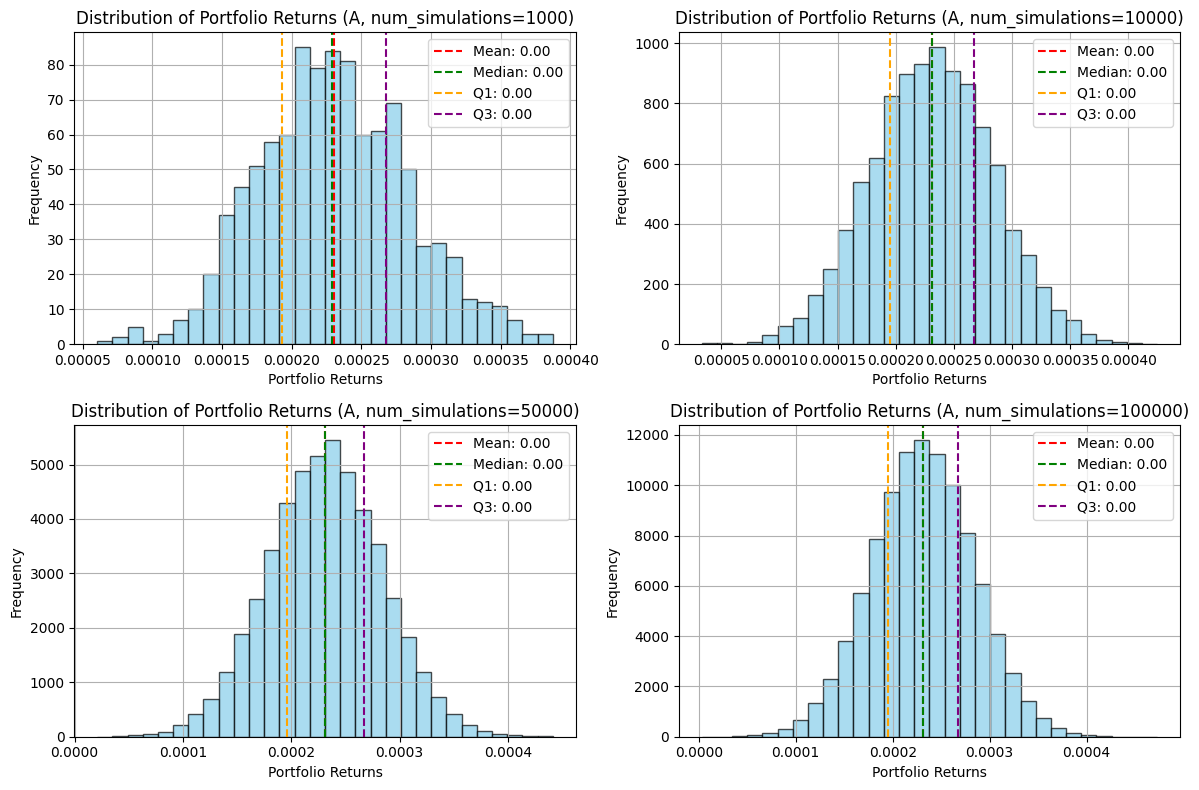

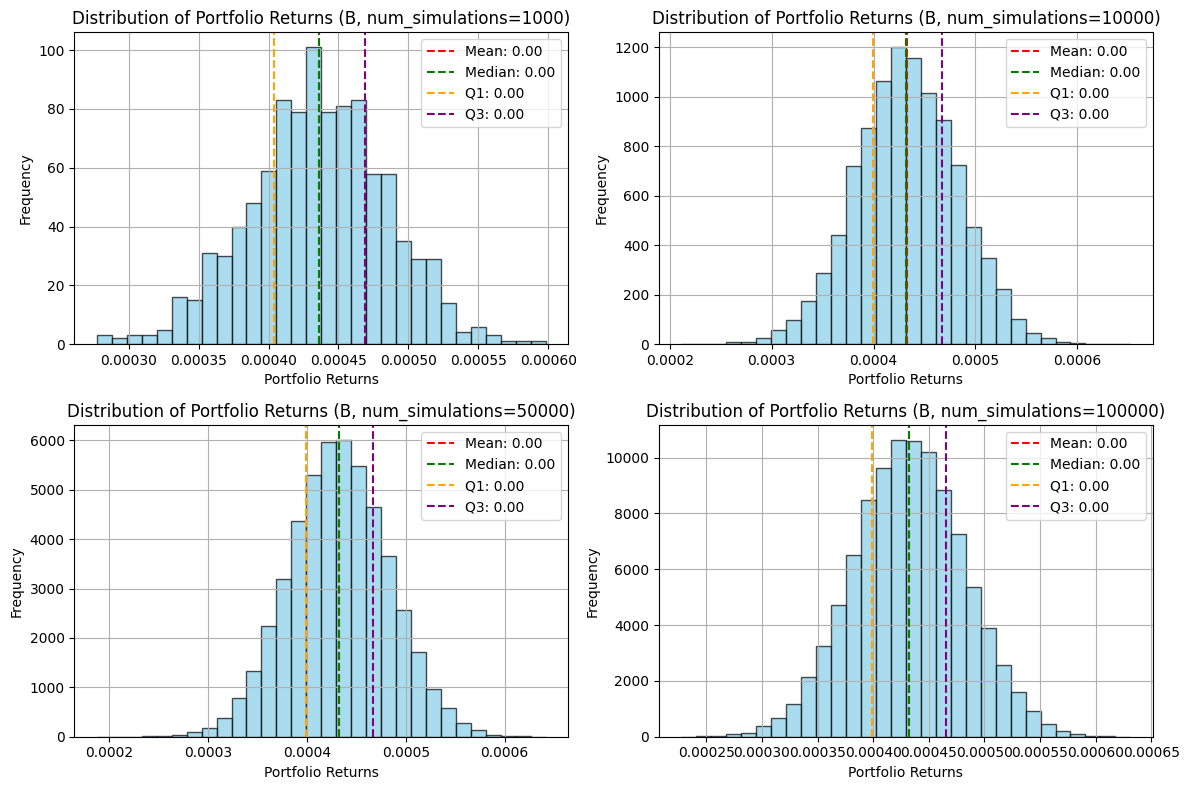

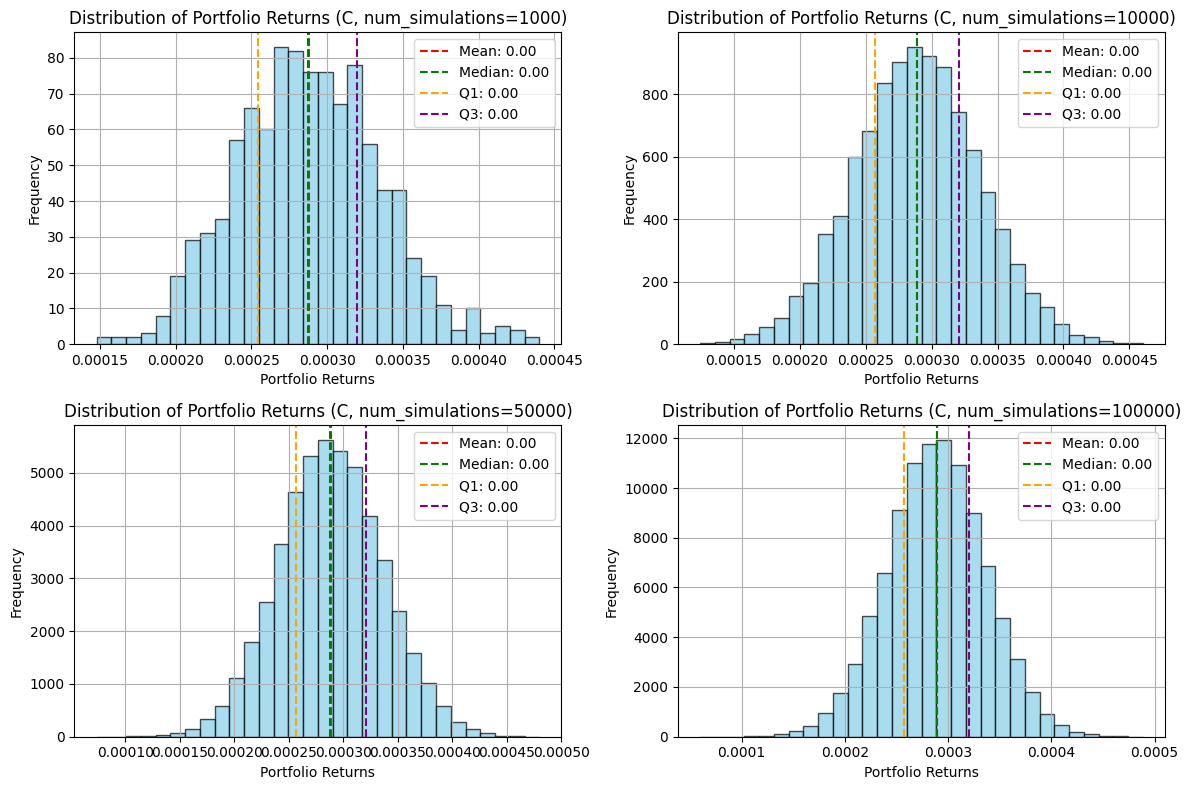

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the values of num_simulations
num_simulations_values = [1000, 10000, 50000, 100000]

# Loop through each student
for student, seed in seed_values.items():
    # Set seed for reproducibility
    np.random.seed(seed)

    # Determine the log returns for the current student
    if student == 'A':
        log_returns_student = log_returns_A
    elif student == 'B':
        log_returns_student = log_returns_B
    elif student == 'C':
        log_returns_student = log_returns_C

    # Plot histograms for different values of num_simulations for each student
    plt.figure(figsize=(12, 8))

    for i, num_simulations in enumerate(num_simulations_values, 1):
        # Initialize an empty array to store portfolio returns for each simulation
        portfolio_returns_mc = np.zeros(num_simulations)

        # Perform Monte Carlo simulation
        for j in range(num_simulations):
            # Generate random weights for each security
            weights_random = np.random.rand(len(log_returns_student.columns))

            # Normalize the weights
            weights_random /= np.sum(weights_random)

            # Calculate portfolio returns based on the randomly selected weights
            portfolio_returns_mc[j] = np.dot(log_returns_student.mean(), weights_random)

        # Plot the histogram for the current num_simulations and student
        plt.subplot(2, 2, i)
        plt.hist(portfolio_returns_mc, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Distribution of Portfolio Returns ({student}, num_simulations={num_simulations})')
        plt.xlabel('Portfolio Returns')
        plt.ylabel('Frequency')
        plt.grid(True)

        # Calculate and plot mean, median, quartiles
        mean_return = np.mean(portfolio_returns_mc)
        median_return = np.median(portfolio_returns_mc)
        q1_return = np.percentile(portfolio_returns_mc, 25)
        q3_return = np.percentile(portfolio_returns_mc, 75)

        plt.axvline(x=mean_return, color='red', linestyle='--', label=f'Mean: {mean_return:.2f}')
        plt.axvline(x=median_return, color='green', linestyle='--', label=f'Median: {median_return:.2f}')
        plt.axvline(x=q1_return, color='orange', linestyle='--', label=f'Q1: {q1_return:.2f}')
        plt.axvline(x=q3_return, color='purple', linestyle='--', label=f'Q3: {q3_return:.2f}')

        plt.legend()

    plt.tight_layout()
    plt.show()



This code generates histograms of portfolio returns for each student using Monte Carlo simulation. It loops through each student, calculates the number of securities in their portfolio, and then performs simulations for different numbers of simulations. The histograms show the distribution of portfolio returns, with mean, median, quartiles, and standard deviation marked on each plot. Additionally, a normal distribution line is fitted to each histogram. Finally, the plots are displayed for visual analysis. This code helps visualize the distribution of potential portfolio returns for each student under different simulation scenarios, aiding in understanding the risk and potential outcomes of their investment strategies.

In [161]:
# Define a dictionary to store portfolio mean return and portfolio risk for each student
portfolio_metrics_per_student = {}

# Loop through each student
for student, log_returns_student in students_log_returns.items():
    # Initialize an empty array to store portfolio returns for each simulation
    portfolio_returns_mc = np.zeros(100000)

    # Perform Monte Carlo simulation
    for j in range(100000):
        # Generate random weights for each security
        weights_random = np.random.rand(len(log_returns_student.columns))

        # Normalize the weights
        weights_random /= np.sum(weights_random)

        # Calculate portfolio returns based on the randomly selected weights
        portfolio_returns_mc[j] = np.dot(log_returns_student.mean(), weights_random)

    # Calculate portfolio mean return and portfolio risk
    portfolio_mean_return = np.mean(portfolio_returns_mc)
    portfolio_risk = np.std(portfolio_returns_mc)

    # Store portfolio metrics for the current student
    portfolio_metrics_per_student[student] = {'Portfolio Mean Return': portfolio_mean_return,
                                              'Portfolio Risk': portfolio_risk}

# Print portfolio metrics for each student
for student, metrics in portfolio_metrics_per_student.items():
    print(f"Portfolio Metrics for Student {student}:")
    print(f"Portfolio Mean Return: {metrics['Portfolio Mean Return']:.6f}")
    print(f"Portfolio Risk: {metrics['Portfolio Risk']:.6f}\n")


Portfolio Metrics for Student A:
Portfolio Mean Return: 0.000231
Portfolio Risk: 0.000053

Portfolio Metrics for Student B:
Portfolio Mean Return: 0.000432
Portfolio Risk: 0.000050

Portfolio Metrics for Student C:
Portfolio Mean Return: 0.000289
Portfolio Risk: 0.000047



To annualize the daily portfolio mean return, we adjust it to account for the number of trading days in a year. Assuming there are 252 trading days in a year, we multiply the daily mean return by 252 to obtain the annualized mean return. Applying this calculation, we find the following annualized portfolio mean returns and volatilities for each student under the 1/N asset allocation strategy. For Student A, the annualized portfolio mean return is 0.058308 with a volatility of 0.061080. Student B's portfolio shows an annualized mean return of 0.108924 and a volatility of 0.065792. Meanwhile, Student C's portfolio exhibits an annualized mean return of 0.072128 and a volatility of 0.060330. These metrics offer valuable insights into the expected return and risk associated with each student's portfolio strategy over a yearly timeframe.

b. Perform a series of historical back-tests to see how the combined
portfolio performs. The students will compare their results with each
other; Please include all 3 sets of code in the final submission, as each
student should code their own version of this step.


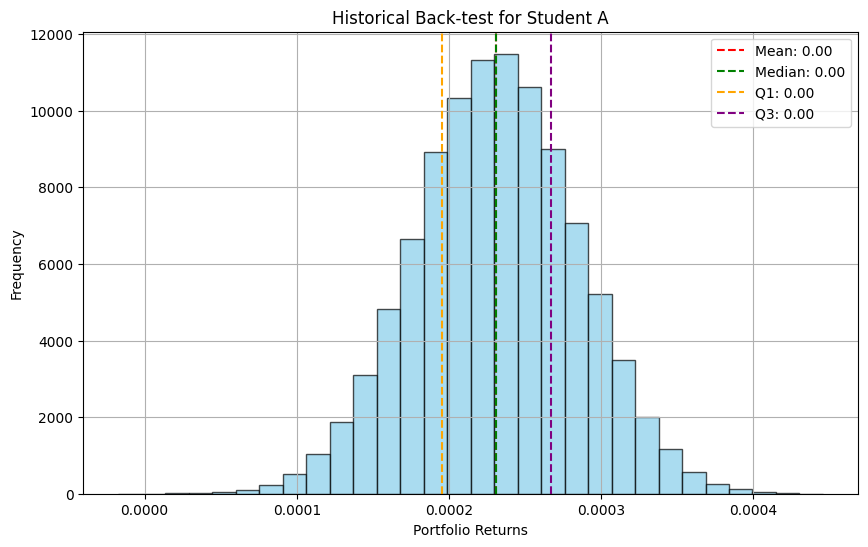

In [162]:
# Historical back-test for Student A
portfolio_returns_mc_A = []

for j in range(num_simulations):
    # Generate random weights for each security
    weights_random = np.random.rand(len(log_returns_A.columns))

    # Normalize the weights
    weights_random /= np.sum(weights_random)

    # Calculate portfolio returns based on the randomly selected weights
    portfolio_returns_mc_A.append(np.dot(log_returns_A.mean(), weights_random))

# Plot the distribution of portfolio returns
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns_mc_A, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Historical Back-test for Student A')
plt.xlabel('Portfolio Returns')
plt.ylabel('Frequency')
plt.grid(True)

# Calculate and plot mean, median, quartiles
mean_return_A = np.mean(portfolio_returns_mc_A)
median_return_A = np.median(portfolio_returns_mc_A)
q1_return_A = np.percentile(portfolio_returns_mc_A, 25)
q3_return_A = np.percentile(portfolio_returns_mc_A, 75)

plt.axvline(x=mean_return_A, color='red', linestyle='--', label=f'Mean: {mean_return_A:.2f}')
plt.axvline(x=median_return_A, color='green', linestyle='--', label=f'Median: {median_return_A:.2f}')
plt.axvline(x=q1_return_A, color='orange', linestyle='--', label=f'Q1: {q1_return_A:.2f}')
plt.axvline(x=q3_return_A, color='purple', linestyle='--', label=f'Q3: {q3_return_A:.2f}')

plt.legend()
plt.show()


2. Collectively, the students summarize the findings by comparing to 1/N strategy
with the Markowitz strategy. For example, how did the allocations hold for the
following 3-month period?


Monte Carlo Solution

# Step 4:Black Litterman

Step 1: Find the implied returns using optimal solutions

In [163]:
import yfinance as yf
import numpy as np
import pandas as pd

# Asset names and weights
assets = ['AMD', 'BA', 'MU', 'CRM', 'TXN', 'UPS', 'CSCO', 'AMAT', 'PFE', 'AAPL',
          'HD', 'GE', 'BAC', 'AMZN', 'LRCX', 'TSLA', 'MS', 'DIS', 'PEP', 'QCOM']

weights = [4.910508e-18, 1.091905e-02, 1.444195e-18, -3.518698e-20, 3.524942e-02,
           3.814839e-02, 3.455837e-02, 3.424654e-18, 1.605904e-01, -8.925751e-19,
           2.914518e-02, 6.182499e-02, 4.466586e-02, 1.223125e-18, 2.730342e-18,
           1.784566e-18, 1.288797e-02, 3.208426e-02, 5.399261e-01, 1.618739e-18]

# Create DataFrame with asset names and weights
portfolio_df = pd.DataFrame({'Company Names': assets, 'Weights': weights})

# Download historical prices
start_date = '2020-03-30'
end_date = '2023-04-01'
df_prices = yf.download(assets, start=start_date, end=end_date)['Adj Close']

# Convert the date format to "MM/DD/YY"
df_prices.index = df_prices.index.strftime('%m/%d/%y')

# Calculate logarithmic returns
asset_returns = np.log(df_prices).diff()
asset_returns = asset_returns.dropna()

# Calculate portfolio returns
portfolio_returns = np.dot(asset_returns.mean(), weights)
portfolio_volatility = np.sqrt(np.dot(weights, np.dot(asset_returns.cov() * 252, weights)))

# Print portfolio statistics
print("Portfolio Mean Return:", portfolio_returns)
print("Portfolio Standard Deviation:", portfolio_volatility)


[*********************100%%**********************]  20 of 20 completed

Portfolio Mean Return: 0.0007753582513573634
Portfolio Standard Deviation: 0.27308758015222145


In [164]:
DJI = yf.download('^DJI', start=start_date, end=end_date)['Adj Close']
DJI_returns = np.log(DJI).diff()
## dropping the first row
DJI_returns = DJI_returns.dropna()
mean_DJI = DJI_returns.mean()*1 - 0.022
vol_DJI = DJI_returns.std()*np.sqrt(1)
sharpe = mean_DJI/vol_DJI
d = sharpe/vol_DJI
asset_returns_cov = asset_returns.cov()*1
implied_equilibrium_returns = d * asset_returns_cov.dot(weights).squeeze()
implied_equilibrium_returns


[*********************100%%**********************]  1 of 1 completed


Ticker
AAPL   -0.037816
AMAT   -0.065305
AMD    -0.060128
AMZN   -0.039981
BA     -0.049494
BAC    -0.034425
CRM    -0.042643
CSCO   -0.027147
DIS    -0.038315
GE     -0.034477
HD     -0.027099
LRCX   -0.068386
MS     -0.037538
MU     -0.056741
PEP    -0.013789
PFE    -0.011277
QCOM   -0.052104
TSLA   -0.061067
TXN    -0.047385
UPS    -0.026363
dtype: float64

In [165]:
(mean_DJI, vol_DJI, sharpe,d)

(-0.021472968897648822,
 0.011714462777806436,
 -1.8330306139458912,
 -156.47585798118274)

In [166]:
import numpy as np

# Redefine matrix P with only 20 rows
P = np.asarray([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Row 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Row 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0]   # Row 3
])

# Redefine the covariance matrix to match the reduced matrix P size (20 x 20)
asset_returns_cov_reduced = asset_returns_cov.iloc[:20, :20]

# Calculate view portfolio variances
view1_var = np.matmul(P[0].reshape(1, -1), np.matmul(asset_returns_cov_reduced.values, P[0].reshape(1, -1).T))
view2_var = np.matmul(P[1].reshape(1, -1), np.matmul(asset_returns_cov_reduced.values, P[1].reshape(1, -1).T))
view3_var = np.matmul(P[2].reshape(1, -1), np.matmul(asset_returns_cov_reduced.values, P[2].reshape(1, -1).T))

print(f'The Variance of View 1 Portfolio is {view1_var[0, 0]}, and the standard deviation is {np.sqrt(view1_var[0, 0]):.3f}\n',\
      f'The Variance of View 2 Portfolio is {view2_var[0, 0]}, and the standard deviation is {np.sqrt(view2_var[0, 0]):.3f}\n',\
      f'The Variance of View 3 Portfolio is {view3_var[0, 0]}, and the standard deviation is {np.sqrt(view3_var[0, 0]):.3f}')


The Variance of View 1 Portfolio is 0.00041663731834893784, and the standard deviation is 0.020
 The Variance of View 2 Portfolio is 0.0, and the standard deviation is 0.000
 The Variance of View 3 Portfolio is 0.0005418200499450762, and the standard deviation is 0.023


# Step 5: Kelly Criteria

The portfolio mean and portfolio risk

In [167]:
import numpy as np
import cvxpy as cvx

def calculate_portfolio_metrics(log_returns):
    # Estimate the covariance matrix from log returns
    covariance_matrix = log_returns.cov()

    # Define other parameters
    r_f = 0.01  # Risk-free rate
    lambda_ = 1  # Coefficient of risk aversion

    # Formulate the optimization problem
    n_assets = len(log_returns.columns)
    w = cvx.Variable(n_assets)
    objective = cvx.Maximize(cvx.sum(cvx.multiply(log_returns.mean().values, w)) - 0.5 * lambda_ * cvx.quad_form(w, covariance_matrix))
    constraints = [cvx.sum(w) == 1, w >= 0]  # Constraint: Sum of weights is 1, weights are non-negative
    problem = cvx.Problem(objective, constraints)

    # Solve the optimization problem
    problem.solve()

    # Retrieve the optimal solution
    optimal_weights = w.value

    # Calculate portfolio mean and risk in annualized terms
    portfolio_mean = np.sum(optimal_weights * log_returns.mean()) * 252
    portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(covariance_matrix.values, optimal_weights))) * np.sqrt(252)

    return optimal_weights, portfolio_mean, portfolio_risk

# Student A
optimal_weights_A, portfolio_mean_A, portfolio_risk_A = calculate_portfolio_metrics(log_returns_A)

# Student B
optimal_weights_B, portfolio_mean_B, portfolio_risk_B = calculate_portfolio_metrics(log_returns_B)

# Student C
optimal_weights_C, portfolio_mean_C, portfolio_risk_C = calculate_portfolio_metrics(log_returns_C)

# Print the results
print("Student A:")
print("Portfolio Mean (annualized):", portfolio_mean_A)
print("Portfolio Risk (annualized):", portfolio_risk_A)
print("\nStudent B:")
print("Portfolio Mean (annualized):", portfolio_mean_B)
print("Portfolio Risk (annualized):", portfolio_risk_B)
print("\nStudent C:")
print("Portfolio Mean (annualized):", portfolio_mean_C)
print("Portfolio Risk (annualized):", portfolio_risk_C)


Student A:
Portfolio Mean (annualized): 0.22343849603539895
Portfolio Risk (annualized): 0.2943672124855536

Student B:
Portfolio Mean (annualized): 0.25345830367897487
Portfolio Risk (annualized): 0.2508709686382286

Student C:
Portfolio Mean (annualized): 0.23606236138166817
Portfolio Risk (annualized): 0.26837478394562525


The optimal weights per each porfolio

In [168]:
optimal_weights_A

array([ 2.23215851e-01,  8.69375676e-23,  5.60376296e-23,  6.12167034e-23,
        1.77594780e-22, -3.04958904e-23,  8.06000137e-23,  7.31558263e-23,
        8.88868335e-23,  6.84269742e-23,  1.08577930e-23,  7.76784149e-01,
        9.12211235e-23,  5.83159985e-23, -6.64303628e-23,  2.82988570e-23,
        8.52464341e-23,  8.45145584e-23,  6.24128097e-23,  1.62696848e-22])

In [169]:
optimal_weights_B

array([ 1.06171754e-22,  6.94977683e-23,  5.97794797e-23, -1.20604523e-23,
        7.35428409e-01,  2.64571591e-01,  3.29428949e-23,  5.27125369e-23,
       -1.68184587e-23,  2.07965460e-22, -2.23606154e-22,  1.76496381e-22,
        2.07965460e-22, -1.13127515e-22,  2.59536443e-22,  6.94977683e-23,
        6.35125199e-23,  1.87597867e-22,  4.04323740e-23,  5.09820623e-23])

In [170]:
optimal_weights_C

array([-1.95085320e-22, -1.95085320e-22, -1.22540247e-22, -6.99693149e-23,
       -1.60643898e-22, -1.36980048e-22, -3.77235838e-23, -1.16418970e-22,
       -1.22540247e-22, -1.53433920e-22, -1.42084426e-23,  3.02947634e-23,
       -2.99945361e-22,  8.01190637e-03,  9.91988094e-01, -2.16781751e-23,
       -1.91942048e-22, -2.66134857e-22,  3.24607445e-23, -1.43929650e-22])